In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hypothesis is that the Random Forest will do better.
# I have always been taught logistic regression works best with fewer X values- the increase in noise, the worse the model performs

In [2]:
# Import the data
file_path = Path("Resources/lending_data.csv")
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
X = df[['loan_size','interest_rate','borrower_income', 'debt_to_income','num_of_accounts','derogatory_marks','total_debt']]
y = df['loan_status']
print("Shape: ",X.shape, y.shape)

Shape:  (77536, 7) (77536,)


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [5]:
classifier=LogisticRegression()
classifier

LogisticRegression()

In [6]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [7]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


# We see a 99.2% for training and 99.1% for testing using Logistic Regression. 

In [8]:
print(f'Actual:\t\t{list(y_test[:50])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:50]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


# I wanted to see the model - but the convolution of the colors makes it hard to discern if there are noise issues here

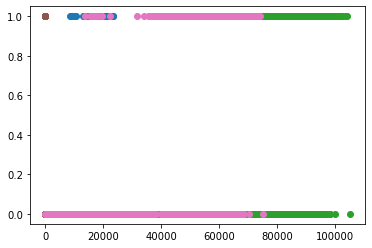

In [11]:
plt.scatter(df["loan_size"], y)
plt.scatter(df["interest_rate"], y)
plt.scatter(df["borrower_income"],y)
plt.scatter(df["debt_to_income"],y)
plt.scatter(df["num_of_accounts"],y)
plt.scatter(df["derogatory_marks"],y)
plt.scatter(df["total_debt"],y)
plt.show()
#this does not show much- how do we know if an x is more or less important?

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

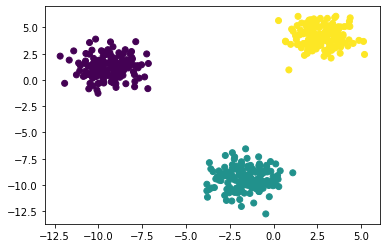

In [14]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)
#here is me checking for the data's linearity. 

# Train a Random Forest Classifier model and print the model score

In [15]:
X = df[['loan_size','interest_rate','borrower_income', 'debt_to_income','num_of_accounts','derogatory_marks','total_debt']]
y = df['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


# We see a 99.75% for training and 99.1% for testing using Random Forest. 

# we see the random forest model performs at a slightly higher training score than the LR model
# when it gets to the training score, both perform about equally though.

[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


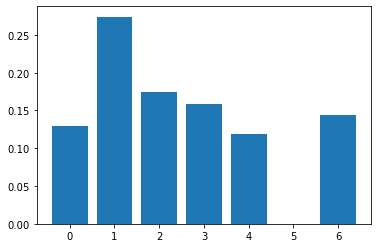

In [18]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

# Of note, the clf feature_importances_ function is super helpful
# it can help root out any missed X values that are not as important as the others. Here we see 5- 'derogatory marks'
# seems to have little importance on loan status.

In [19]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

### For this particular model, I would end up using logistic regression
### for the reduction of noise- we saw column 5 (derogatory marks) was noise, Logistic regression performs better when the 
### number of noise variables is less than or equal to the number of explanatory variables 
### and the random forest has a higher true and false positive rate as the number of explanatory variables increases in a dataset.
 
### So, the noise was not enough to cause issues in the Logistic model, and the linear nature of the data found-
### using make_blobs function would push my decision to use the Logistic Regression model.

### Both models perform nearly the same on the test data, and close to the same on training data
### So, either would work, but personal choice -after looking at the results- would be to use Logistic Regression
### solely due to the linearity noted when I used the make_blobs function.
### But, this exercise has taught me the value of checking both models before coming to a conclusion.